In [1]:
!pip install datasets timm einops transformers pillow huggingface_hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 89.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.4 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 18.0.0 which is incompatible.
ib

In [2]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) y
Token is valid (permission: write).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in 

In [3]:
!pip install flash_attn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 79.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for flash_attn: filename=flash_attn-2.6.3-cp310-cp310-linux_x86_64.whl size=187309225 sha256=237ef9c6157db394e1ddde4ba609a21ebb98382377a27041edc09318801a6f24
  Stored in directory: /root/.cache/pip/wheels/7e/e3/c3/89c7a2f3c4adc07cd1c675f8bb7b9ad4d18f64a72bccdfe826
Successfully built flash_attn


In [4]:
import os
import torch
from tqdm import tqdm
import tensorflow as tf
from datasets import load_dataset
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from transformers import AutoModelForCausalLM, AutoProcessor
from transformers import AdamW, AutoProcessor, get_scheduler

In [5]:
device_name = tf.test.gpu_device_name()

if device_name == '/device:GPU:0':
    physical_devices = tf.config.experimental.list_physical_devices('GPU')
    gpu_details = tf.config.experimental.get_device_details(physical_devices[0])
    print(f"Found GPU at: {device_name}")
    print("GPU Name:", gpu_details.get("device_name", "Unknown GPU"))
    print("CUDA Version:", tf.sysconfig.get_build_info()["cuda_version"])
    print("CUDNN Version:", tf.sysconfig.get_build_info()["cudnn_version"])
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0
GPU Name: NVIDIA A100-SXM4-40GB
CUDA Version: 12.3
CUDNN Version: 8


In [6]:
data = load_dataset("HuggingFaceM4/DocumentVQA")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModelForCausalLM.from_pretrained("microsoft/Florence-2-base-ft", trust_remote_code=True, revision='refs/pr/6').to(device)
processor = AutoProcessor.from_pretrained("microsoft/Florence-2-base-ft", trust_remote_code=True, revision='refs/pr/6')
torch.cuda.empty_cache()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/806 [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/38 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/17 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/17 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/38 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/17 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/17 [00:00<?, ?it/s]

train-00000-of-00038.parquet:   0%|          | 0.00/61.0M [00:00<?, ?B/s]

train-00001-of-00038.parquet:   0%|          | 0.00/275M [00:00<?, ?B/s]

train-00002-of-00038.parquet:   0%|          | 0.00/220M [00:00<?, ?B/s]

train-00003-of-00038.parquet:   0%|          | 0.00/83.2M [00:00<?, ?B/s]

train-00004-of-00038.parquet:   0%|          | 0.00/20.4M [00:00<?, ?B/s]

train-00005-of-00038.parquet:   0%|          | 0.00/24.0M [00:00<?, ?B/s]

train-00006-of-00038.parquet:   0%|          | 0.00/26.2M [00:00<?, ?B/s]

train-00007-of-00038.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

train-00008-of-00038.parquet:   0%|          | 0.00/33.3M [00:00<?, ?B/s]

train-00009-of-00038.parquet:   0%|          | 0.00/33.8M [00:00<?, ?B/s]

train-00010-of-00038.parquet:   0%|          | 0.00/25.1M [00:00<?, ?B/s]

train-00011-of-00038.parquet:   0%|          | 0.00/188M [00:00<?, ?B/s]

train-00012-of-00038.parquet:   0%|          | 0.00/210M [00:00<?, ?B/s]

train-00013-of-00038.parquet:   0%|          | 0.00/333M [00:00<?, ?B/s]

train-00014-of-00038.parquet:   0%|          | 0.00/126M [00:00<?, ?B/s]

train-00015-of-00038.parquet:   0%|          | 0.00/292M [00:00<?, ?B/s]

train-00016-of-00038.parquet:   0%|          | 0.00/330M [00:00<?, ?B/s]

train-00017-of-00038.parquet:   0%|          | 0.00/306M [00:00<?, ?B/s]

train-00018-of-00038.parquet:   0%|          | 0.00/355M [00:00<?, ?B/s]

train-00019-of-00038.parquet:   0%|          | 0.00/321M [00:00<?, ?B/s]

train-00020-of-00038.parquet:   0%|          | 0.00/381M [00:00<?, ?B/s]

train-00021-of-00038.parquet:   0%|          | 0.00/276M [00:00<?, ?B/s]

train-00022-of-00038.parquet:   0%|          | 0.00/394M [00:00<?, ?B/s]

train-00023-of-00038.parquet:   0%|          | 0.00/382M [00:00<?, ?B/s]

train-00024-of-00038.parquet:   0%|          | 0.00/346M [00:00<?, ?B/s]

train-00025-of-00038.parquet:   0%|          | 0.00/321M [00:00<?, ?B/s]

train-00026-of-00038.parquet:   0%|          | 0.00/89.4M [00:00<?, ?B/s]

train-00027-of-00038.parquet:   0%|          | 0.00/51.1M [00:00<?, ?B/s]

train-00028-of-00038.parquet:   0%|          | 0.00/103M [00:00<?, ?B/s]

train-00029-of-00038.parquet:   0%|          | 0.00/226M [00:00<?, ?B/s]

train-00030-of-00038.parquet:   0%|          | 0.00/291M [00:00<?, ?B/s]

train-00031-of-00038.parquet:   0%|          | 0.00/240M [00:00<?, ?B/s]

train-00032-of-00038.parquet:   0%|          | 0.00/130M [00:00<?, ?B/s]

train-00033-of-00038.parquet:   0%|          | 0.00/48.2M [00:00<?, ?B/s]

train-00034-of-00038.parquet:   0%|          | 0.00/105M [00:00<?, ?B/s]

train-00035-of-00038.parquet:   0%|          | 0.00/156M [00:00<?, ?B/s]

train-00036-of-00038.parquet:   0%|          | 0.00/270M [00:00<?, ?B/s]

train-00037-of-00038.parquet:   0%|          | 0.00/306M [00:00<?, ?B/s]

validation-00000-of-00017.parquet:   0%|          | 0.00/46.0M [00:00<?, ?B/s]

validation-00001-of-00017.parquet:   0%|          | 0.00/29.4M [00:00<?, ?B/s]

validation-00002-of-00017.parquet:   0%|          | 0.00/52.6M [00:00<?, ?B/s]

validation-00003-of-00017.parquet:   0%|          | 0.00/40.4M [00:00<?, ?B/s]

validation-00004-of-00017.parquet:   0%|          | 0.00/61.6M [00:00<?, ?B/s]

validation-00005-of-00017.parquet:   0%|          | 0.00/57.0M [00:00<?, ?B/s]

validation-00006-of-00017.parquet:   0%|          | 0.00/58.5M [00:00<?, ?B/s]

validation-00007-of-00017.parquet:   0%|          | 0.00/79.4M [00:00<?, ?B/s]

validation-00008-of-00017.parquet:   0%|          | 0.00/71.7M [00:00<?, ?B/s]

validation-00009-of-00017.parquet:   0%|          | 0.00/66.7M [00:00<?, ?B/s]

validation-00010-of-00017.parquet:   0%|          | 0.00/60.5M [00:00<?, ?B/s]

validation-00011-of-00017.parquet:   0%|          | 0.00/57.5M [00:00<?, ?B/s]

validation-00012-of-00017.parquet:   0%|          | 0.00/100M [00:00<?, ?B/s]

validation-00013-of-00017.parquet:   0%|          | 0.00/71.4M [00:00<?, ?B/s]

validation-00014-of-00017.parquet:   0%|          | 0.00/65.2M [00:00<?, ?B/s]

validation-00015-of-00017.parquet:   0%|          | 0.00/77.1M [00:00<?, ?B/s]

validation-00016-of-00017.parquet:   0%|          | 0.00/77.8M [00:00<?, ?B/s]

test-00000-of-00017.parquet:   0%|          | 0.00/70.0M [00:00<?, ?B/s]

test-00001-of-00017.parquet:   0%|          | 0.00/34.4M [00:00<?, ?B/s]

test-00002-of-00017.parquet:   0%|          | 0.00/50.8M [00:00<?, ?B/s]

test-00003-of-00017.parquet:   0%|          | 0.00/55.2M [00:00<?, ?B/s]

test-00004-of-00017.parquet:   0%|          | 0.00/64.9M [00:00<?, ?B/s]

test-00005-of-00017.parquet:   0%|          | 0.00/58.2M [00:00<?, ?B/s]

test-00006-of-00017.parquet:   0%|          | 0.00/65.9M [00:00<?, ?B/s]

test-00007-of-00017.parquet:   0%|          | 0.00/63.5M [00:00<?, ?B/s]

test-00008-of-00017.parquet:   0%|          | 0.00/69.5M [00:00<?, ?B/s]

test-00009-of-00017.parquet:   0%|          | 0.00/61.1M [00:00<?, ?B/s]

test-00010-of-00017.parquet:   0%|          | 0.00/70.4M [00:00<?, ?B/s]

test-00011-of-00017.parquet:   0%|          | 0.00/68.1M [00:00<?, ?B/s]

test-00012-of-00017.parquet:   0%|          | 0.00/69.0M [00:00<?, ?B/s]

test-00013-of-00017.parquet:   0%|          | 0.00/83.3M [00:00<?, ?B/s]

test-00014-of-00017.parquet:   0%|          | 0.00/59.0M [00:00<?, ?B/s]

test-00015-of-00017.parquet:   0%|          | 0.00/91.6M [00:00<?, ?B/s]

test-00016-of-00017.parquet:   0%|          | 0.00/85.8M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/39463 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5349 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5188 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/51 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/2.43k [00:00<?, ?B/s]

configuration_florence2.py:   0%|          | 0.00/15.1k [00:00<?, ?B/s]

modeling_florence2.py:   0%|          | 0.00/127k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


pytorch_model.bin:   0%|          | 0.00/464M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

processing_florence2.py:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/34.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-base-ft:
- configuration_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


**Question:** DocVQA What do you see in this image?

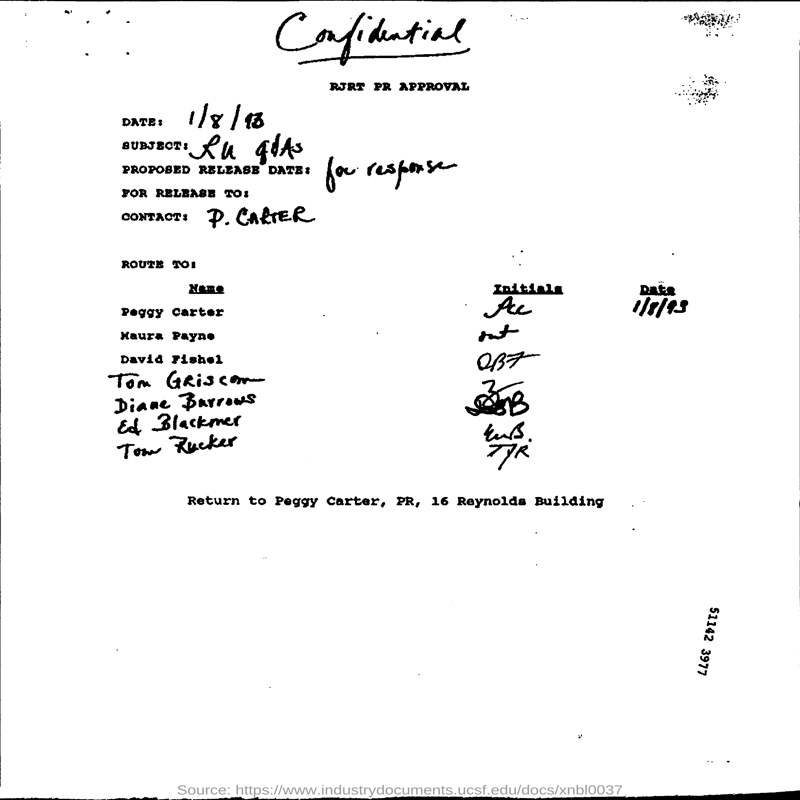

{'DocVQA': 'unanswerable'}

In [7]:
from PIL import Image
from IPython.display import display, Markdown

def run_example(task_prompt, text_input, image, display_size=(800, 800)):
    question_text = f"**Question:** {task_prompt} {text_input}"
    display(Markdown(question_text))

    small_image = image.resize(display_size)
    display(small_image)
    prompt = task_prompt + text_input

    if image.mode != "RGB":
        image = image.convert("RGB")

    inputs = processor(text=prompt, images=image, return_tensors="pt").to(device)
    generated_ids = model.generate(
        input_ids=inputs["input_ids"],
        pixel_values=inputs["pixel_values"],
        max_new_tokens=1024,
        num_beams=3
    )
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
    parsed_answer = processor.post_process_generation(generated_text, task=task_prompt, image_size=(image.width, image.height))

    return parsed_answer

run_example("DocVQA", 'What do you see in this image?', data['train'][0]['image'])

In [8]:
class DocVQADataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        example = self.data[idx]
        question = "<DocVQA>" + example['question']
        first_answer = example['answers'][0]
        image = example['image']
        if image.mode != "RGB":
            image = image.convert("RGB")
        return question, first_answer, image

#taking around 25% of the data available
train_dataset = DocVQADataset(data['train'].select(range(10000)))
val_dataset = DocVQADataset(data['validation'].select(range(1250)))
test_dataset = DocVQADataset(data['test'].select(range(1250)))

In [9]:
def collate_fn(batch):
    questions, answers, images = zip(*batch)
    inputs = processor(text=list(questions), images=list(images), return_tensors="pt", padding=True).to(device)
    return inputs, answers

In [10]:
batch_size = 32
num_workers = 0
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn, num_workers=num_workers)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn, num_workers=num_workers)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn, num_workers=num_workers)

def train_model(train_loader, val_loader, model, processor, epochs=10, lr=1e-5, patience=3):
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr)
    num_training_steps = epochs * len(train_loader)
    lr_scheduler = get_scheduler(
        name="linear",
        optimizer=optimizer,
        num_warmup_steps=0,
        num_training_steps=num_training_steps,
    )

    best_val_loss = float("inf")
    wait = 0

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for batch in tqdm(train_loader, desc=f"Training Epoch {epoch + 1}/{epochs}"):
            inputs, answers = batch
            input_ids = inputs["input_ids"]
            pixel_values = inputs["pixel_values"]
            labels = processor.tokenizer(text=answers, return_tensors="pt", padding=True).input_ids.to(device)

            outputs = model(input_ids=input_ids, pixel_values=pixel_values, labels=labels)
            loss = outputs.loss

            loss.backward()
            optimizer.step()
            lr_scheduler.step()
            optimizer.zero_grad()

            train_loss += loss.item()

        avg_train_loss = train_loss / len(train_loader)
        print(f"Average Training Loss: {avg_train_loss}")

        model.eval()
        val_loss = 0
        with torch.no_grad():
            for batch in tqdm(val_loader, desc=f"Validation Epoch {epoch + 1}/{epochs}"):
                inputs, answers = batch
                input_ids = inputs["input_ids"]
                pixel_values = inputs["pixel_values"]
                labels = processor.tokenizer(text=answers, return_tensors="pt", padding=True).input_ids.to(device)

                outputs = model(input_ids=input_ids, pixel_values=pixel_values, labels=labels)
                val_loss += outputs.loss.item()

        avg_val_loss = val_loss / len(val_loader)
        print(f"Average Validation Loss: {avg_val_loss}")

        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            wait = 0

            output_dir = f"./model_checkpoints/best_model"
            os.makedirs(output_dir, exist_ok=True)
            model.save_pretrained(output_dir)
            processor.save_pretrained(output_dir)

        else:
            wait += 1
            print(f"No improvement in validation loss for {wait} epoch(s)")

            if wait >= patience:
                print(f"Early stopping triggered after {epoch + 1} epochs")
                break

for param in model.vision_tower.parameters():
    param.requires_grad = False

train_model(train_loader, val_loader, model, processor, epochs=10, patience=3)

Training Epoch 1/10: 100%|██████████| 313/313 [25:04<00:00,  4.81s/it]


Average Training Loss: 1.3788993480487373


Validation Epoch 1/10: 100%|██████████| 40/40 [03:12<00:00,  4.81s/it]


Average Validation Loss: 0.7075957968831063


Training Epoch 2/10: 100%|██████████| 313/313 [24:59<00:00,  4.79s/it]


Average Training Loss: 0.5081168044679842


Validation Epoch 2/10: 100%|██████████| 40/40 [03:12<00:00,  4.82s/it]


Average Validation Loss: 0.6916236035525799


Training Epoch 3/10: 100%|██████████| 313/313 [24:59<00:00,  4.79s/it]


Average Training Loss: 0.4154256840293019


Validation Epoch 3/10: 100%|██████████| 40/40 [03:12<00:00,  4.82s/it]


Average Validation Loss: 0.6861997254192829


Training Epoch 4/10: 100%|██████████| 313/313 [24:59<00:00,  4.79s/it]


Average Training Loss: 0.348312944887926


Validation Epoch 4/10: 100%|██████████| 40/40 [03:12<00:00,  4.82s/it]


Average Validation Loss: 0.6985539592802524
No improvement in validation loss for 1 epoch(s)


Training Epoch 5/10: 100%|██████████| 313/313 [25:01<00:00,  4.80s/it]


Average Training Loss: 0.3077410670895927


Validation Epoch 5/10: 100%|██████████| 40/40 [03:12<00:00,  4.81s/it]


Average Validation Loss: 0.7066814802587033
No improvement in validation loss for 2 epoch(s)


Training Epoch 6/10: 100%|██████████| 313/313 [24:58<00:00,  4.79s/it]


Average Training Loss: 0.276283577322579


Validation Epoch 6/10: 100%|██████████| 40/40 [03:12<00:00,  4.81s/it]

Average Validation Loss: 0.7051296517252922
No improvement in validation loss for 3 epoch(s)
Early stopping triggered after 6 epochs


In [18]:
model.push_to_hub("sahilnishad/Florence-2-FT-DocVQA")
processor.push_to_hub("sahilnishad/Florence-2-FT-DocVQA")

model.safetensors:   0%|          | 0.00/1.08G [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.17k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/sahilnishad/Florence-2-FT-DocVQA/commit/5f8252b20830167a783c6ccae166d540cfe30d7a', commit_message='Upload processor', commit_description='', oid='5f8252b20830167a783c6ccae166d540cfe30d7a', pr_url=None, pr_revision=None, pr_num=None)

**Question:** DocVQA what is the name?

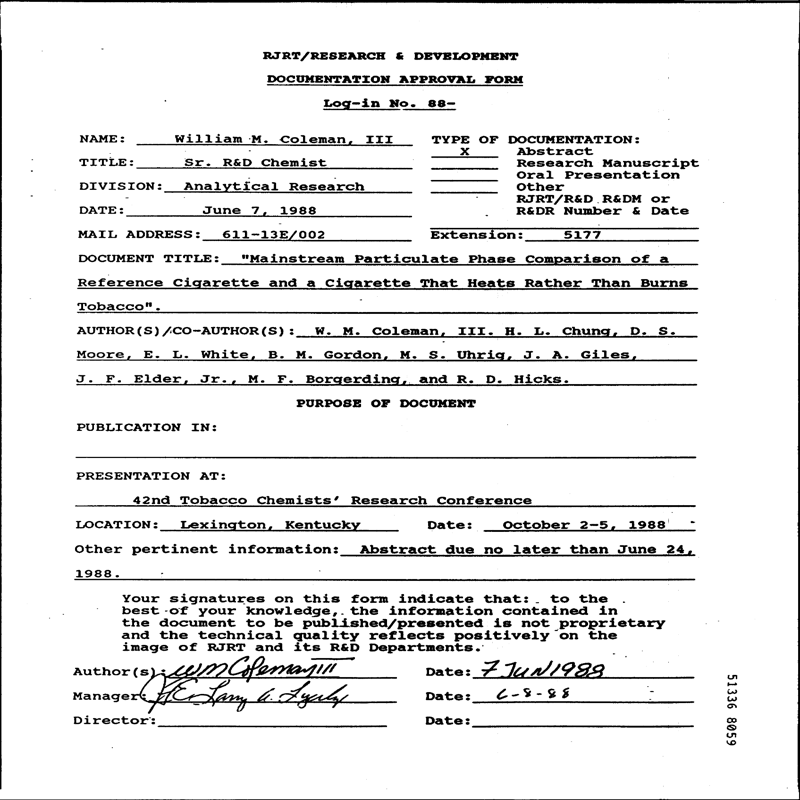

{'DocVQA': 'William M. Coleman, III'}

In [34]:
from PIL import Image
from IPython.display import display, Markdown

def run_example(task_prompt, text_input, image, display_size=(800, 800)):
    question_text = f"**Question:** {task_prompt} {text_input}"
    display(Markdown(question_text))

    small_image = image.resize(display_size)
    display(small_image)
    prompt = task_prompt + text_input

    if image.mode != "RGB":
        image = image.convert("RGB")

    inputs = processor(text=prompt, images=image, return_tensors="pt").to(device)
    generated_ids = model.generate(
        input_ids=inputs["input_ids"],
        pixel_values=inputs["pixel_values"],
        max_new_tokens=1024,
        num_beams=3
    )
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
    parsed_answer = processor.post_process_generation(generated_text, task=task_prompt, image_size=(image.width, image.height))

    return parsed_answer

run_example("DocVQA", 'what is the name?', data['test'][10]['image'])